In [1]:
from typing import Annotated
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI
from pydantic import BaseModel
import random
import gradio as gr
from IPython.display import display, Image
from dotenv import load_dotenv

In [2]:
nouns = ["Cabbages", "Unicorns", "Toasters", "Penguins", "Bananas", "Zombies", "Rainbows", "Eels", "Pickles", "Muffins"]
adjectives = ["outrageous", "smelly", "pedantic", "existential", "moody", "sparkly", "untrustworthy", "sarcastic", "squishy", "haunted"]

In [3]:
load_dotenv(override=True)

True

In [4]:
def shout(text: Annotated[str, "something to be shouted"]) -> str:
    print(text.upper())
    return text.upper()

In [5]:
shout("HELLO")

HELLO


'HELLO'

In [6]:
class State(BaseModel):
    messages: Annotated[list, add_messages]

In [7]:
graph_builder = StateGraph(State)

In [8]:
def our_first_node(old_state:State) -> State:
    reply = f"{random.choice(nouns)} are {random.choice(adjectives)}"
    messages = [{"role": "assistant","content": reply}]
    new_state = State(messages=messages)
    return new_state

In [9]:
graph_builder.add_node("first_node",our_first_node)

In [10]:
graph_builder.add_edge(START, "first_node")
graph_builder.add_edge("first_node",END)

In [11]:
graph = graph_builder.compile()

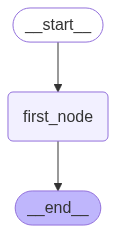

In [12]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [13]:
def chat(message: str, history):
    message = {"role":"user","content": message}
    messages = [message]
    state = State(messages=messages)
    result = graph.invoke(state)
    print(result)
    return result["messages"][-1].content

In [14]:
gr.ChatInterface(chat, type="messages").launch()

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


In [15]:
class State(BaseModel):
    messages: Annotated[list, add_messages]

In [16]:
graph_builder = StateGraph(State)

In [17]:
llm = ChatOpenAI(model="gpt-4.1-mini")

In [18]:
def chatbot_node(old_state: State) -> State:
    response = llm.invoke(old_state.messages)
    messages = [response]
    new_state = State(messages=messages)
    return new_state

In [19]:
graph_builder.add_node("chatbot_node",chatbot_node)

In [20]:
graph_builder.add_edge(START, "chatbot_node")
graph_builder.add_edge("chatbot_node",END)

In [21]:
graph = graph_builder.compile()

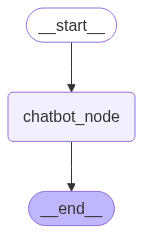

In [22]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [23]:
def chat(message: str, history):
    state = State(messages=[{"role":"user","content":message}])
    result = graph.invoke(state)
    print(result)
    return result["messages"][-1].content

In [ ]:
gr.ChatInterface(chat, type="messages").launch()

* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.


{'messages': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}, id='7d8d00e3-0852-4de2-aa68-6320492a762f'), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_3f58d112f7', 'id': 'chatcmpl-C6YhdG5qFJEs3LErQktyx9BU1q6zn', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--90ec3070-539e-4e98-816a-0c2607a7345c-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}
{'messages': [HumanMessage(content='wh